# imports

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fsolve

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv2
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.morphology import disk,square, erosion, dilation, opening, closing


from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

from skimage.filters import threshold_otsu


import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt


from ipynb.fs.full.toolbox import *

import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv2
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt


from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

from skimage.filters import threshold_otsu
from skimage.filters.rank import mean,median


from skimage import io, transform, img_as_ubyte

import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt

from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.segmentation import clear_border
from skimage.color import lab2rgb
from skimage.color import label2rgb
from skimage.measure import profile_line, label, regionprops
from skimage import io, color, filters, measure
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt


from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

# dicom

In [55]:
# Read a CT DICOM image
in_dir = r"./data/kidney_analysis"
ct = dicom.read_file(in_dir + r'/1-162.dcm')
img = ct.pixel_array

In [56]:
# extraer los valores de los px en la aorta, kidney, etc...
# Read a ROI image
back_roi = io.imread(in_dir + r'\BackROI.png')
# convert to boolean image
back_mask = back_roi > 0
# Obtain the Hounsfield unit values 
back_values = img[back_mask]

# Read a ROI image
liver_roi = io.imread(in_dir + r'\LiverROI.png')
# convert to boolean image
liver_mask = liver_roi > 0
# Obtain the Hounsfield unit values 
liver_values = img[liver_mask]

# Read a ROI image
kidney_roi = io.imread(in_dir + r'\KidneyROI.png')
# convert to boolean image
kidney_mask = kidney_roi > 0
# Obtain the Hounsfield unit values 
kidney_values = img[kidney_mask]

# Read a ROI image
aorta_roi = io.imread(in_dir + r'\AortaROI.png')
# convert to boolean image
aorta_mask = aorta_roi > 0
# Obtain the Hounsfield unit values 
aorta_values = img[aorta_mask]

In [57]:
# determina los threshokd separando 
# t1 separa liver y kidney, t2 separa kidney y aorta
mean_back = np.mean(back_values)
mean_liver = np.mean(liver_values)
mean_kidney = np.mean(kidney_values)
mean_aorta = np.mean(aorta_values)

In [58]:
# liver y kidney t1
t1 = (mean_liver + mean_kidney)/2
# kidney y aorta
t2 = (mean_kidney+mean_aorta)/2

In [59]:
print("t1:", t1)

t1: 135.53619417264818


In [60]:
print("t2:", t2)

t2: 196.7035801627044


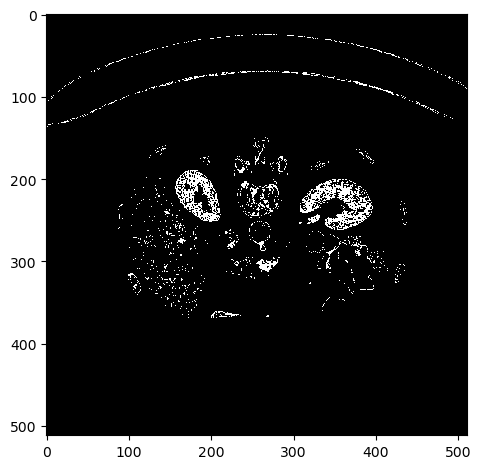

In [61]:
binary_img = (img > t1) & (img < t2)
io.imshow(binary_img)

In [64]:
kidney_roi = np.array(kidney_roi, dtype=bool)
img = np.array(binary_img, dtype=bool)

# Dice similarity function
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

dice_score = dice(img,kidney_roi, k = 1) #255 in my case, can be 1 
print ("Dice Similarity: {}".format(dice_score))

Dice Similarity: 0.24143337066069429


# HOUGH

In [65]:
# Mapping from Hough Space to Cartesian Space 
# Given Hough space parameters
import numpy as np

rho = 0.29
theta_degrees = 151

# Convert theta from degrees to radians
theta_rad = theta_degrees * (np.pi / 180)

# Function to calculate y for a given x
def calculate_y(x):
    return (rho - x * np.cos(theta_rad)) / np.sin(theta_rad)

# Calculate y for a range of x values
x_values = [1,2,3,4,5,6,7,8,9,10,11]  # Choose different x values
corresponding_y_values = [calculate_y(x) for x in x_values]

# Display the approximate data points
print("Approximate data points in the xy-plane:")
for i, x in enumerate(x_values):
    y = corresponding_y_values[i]
    print(f"({x}, {y:.2f})")

Approximate data points in the xy-plane:
(1, 2.40)
(2, 4.21)
(3, 6.01)
(4, 7.81)
(5, 9.62)
(6, 11.42)
(7, 13.23)
(8, 15.03)
(9, 16.83)
(10, 18.64)
(11, 20.44)


# pixel wise operations

In [67]:
path = r"./data/pixelwise.png"
img = io.imread(path)

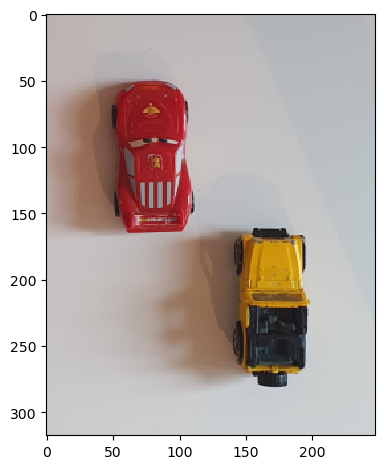

In [68]:
io.imshow(img)

In [69]:
img = rgb2gray(img)
img.dtype

dtype('float64')

In [70]:
# conveirte la imagen: linear gray scale transformation
new_min = 0.1
new_max = 0.6

# Calculate the scaling factor (a) and offset (b)
a = (new_max - new_min) / (img.max() - img.min())
b = new_min - a * img.min()

# Apply the linear transformation
transformed_img = a * img + b

# Clip the values to ensure they are in the valid range [0, 1]
transformed_img = np.clip(transformed_img, 0, 1)

In [78]:
from skimage.filters import threshold_otsu

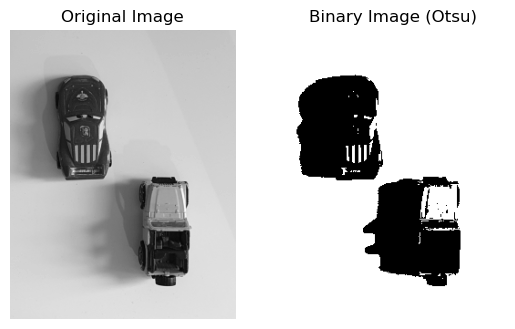

In [80]:
thresh_value = threshold_otsu(transformed_img)

# Apply the threshold to binarize the image
binary_image = transformed_img > thresh_value

# Display the original and binary images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Otsu)')
plt.axis('off')

plt.show()

In [81]:
print(thresh_value)

0.3724609375


# rocket

In [82]:
path = r"./data/rocket.png"
img = io.imread(path)

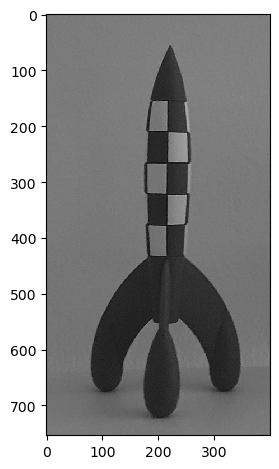

In [83]:
io.imshow(img)

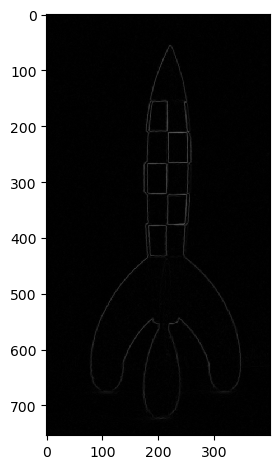

In [84]:
edg = prewitt(img)
io.imshow(edg, cmap='gray')

In [95]:
bin_img = edg > 0.06

In [97]:
import numpy as np

counter = 0
for i in range(0, bin_img.shape[0] - 1):
    for j in range(0, bin_img.shape[1] - 1):
        if np.any(bin_img[i][j] == 1):
            counter += 1

print(counter)

7828


# animal sorting machine

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Training data
cows = np.array([26, 46, 33, 23, 35, 28, 21, 30, 38, 43])
sheep = np.array([67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100])

# Compute mean and standard deviation for cows and sheep
mean_cows, std_cows = np.mean(cows), np.std(cows)
mean_sheep, std_sheep = np.mean(sheep), np.std(sheep)

# Compute intensity threshold using the minimum distance classifier
intensity_threshold = (mean_cows + mean_sheep) / 2

# Display the results
print("Intensity Threshold (Minimum Distance Classifier):", intensity_threshold)

# Fit Gaussians to the data
x = np.linspace(min(min(cows), min(sheep)), max(max(cows), max(sheep)), 1000)

pdf_cows = norm.pdf(x, mean_cows, std_cows)
pdf_sheep = norm.pdf(x, mean_sheep, std_sheep)

# Find the intersection point
intersection_point = np.argmin(np.abs(pdf_cows - pdf_sheep))

# Display the results
print("Intersection Point (Parametric Classification):", x[intersection_point])

Intensity Threshold (Minimum Distance Classifier): 41.233333333333334
Intersection Point (Parametric Classification): 43.3003003003003


In [117]:
from scipy.stats import norm

# Given values
value = 38

# Compute the probability density for cows and sheep at the given value
pdf_cows_at_38 = norm.pdf(value, mean_cows, std_cows)
pdf_sheep_at_38 = norm.pdf(value, mean_sheep, std_sheep)

# Display the results
print("Probability Density for Cows at 38:", pdf_cows_at_38)
print("Probability Density for Sheep at 38:", pdf_sheep_at_38)


Probability Density for Cows at 38: 0.03898570495862376
Probability Density for Sheep at 38: 0.016687527843330045


# Finding mini figures

In [124]:
path = r"./data/figures.png"
img = io.imread(path)

In [125]:
img = rgb2gray(img)
img.dtype

dtype('float64')

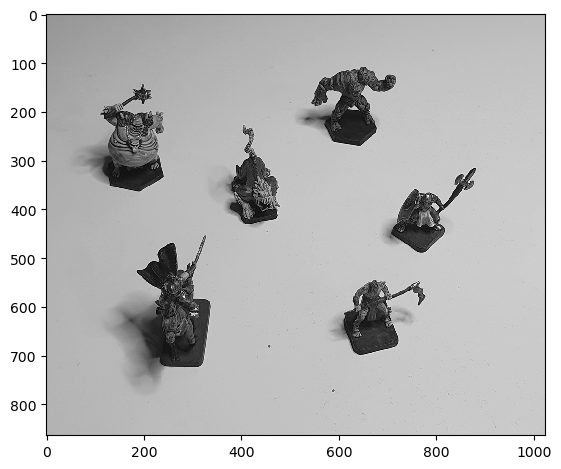

In [126]:
io.imshow(img)

In [135]:
thresh_value = threshold_otsu(img)

# Apply the threshold to binarize the image
binary_image = img < thresh_value

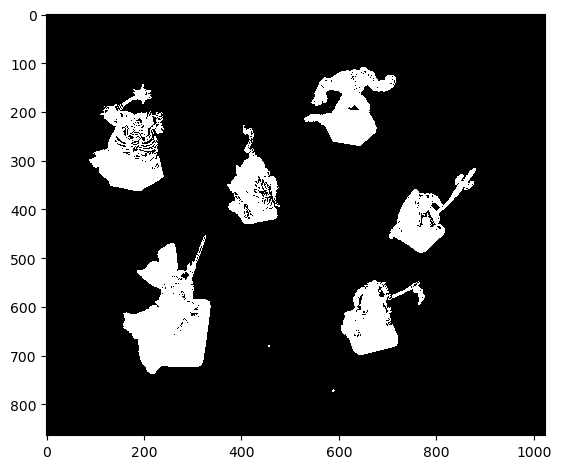

In [136]:
io.imshow(binary_image)

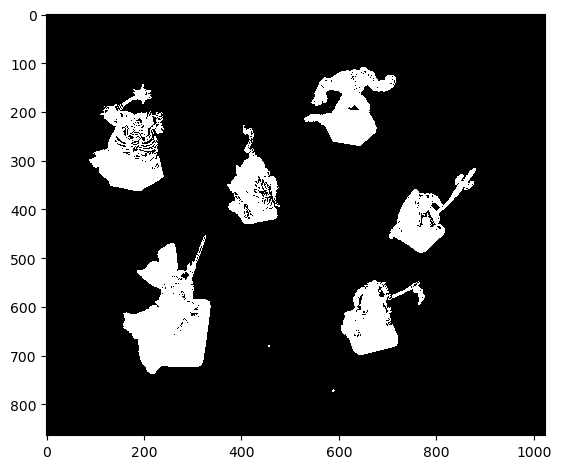

In [137]:
img_no_border = clear_border(binary_image)
io.imshow(img_no_border)

In [138]:
label_img = measure.label(img_no_border, connectivity=2)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")
# EL NUMERO DE LABELS ES EL NUMERO DE BLOBS

Number of labels: 31


In [140]:
properties = measure.regionprops(label_img)
filtered_labels = [prop.label for prop in properties if prop.area > 13000]
print(filtered_labels)

[1, 3, 25]


In [142]:
# Find the properties of the labeled regions
regions = measure.regionprops(label_img)

# Find the largest blob
largest_blob = max(regions, key=lambda r: r.area)

# Find the area (in pixels) of the largest blob
largest_blob_area = largest_blob.area

print("Area of the largest BLOB:", largest_blob_area)
print("Perimeter of the largest BLOB:", largest_blob.perimeter)

Area of the largest BLOB: 27828.0
Perimeter of the largest BLOB: 1998.35761056913


# Car data analysis


In [153]:
in_dir="./data"
txt_name="/car_data.txt"
data = np.loadtxt(in_dir + txt_name, comments="%")

In [154]:
data.shape

(203, 8)

In [162]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data by dividing each measurement by its standard deviation
standardized_data = StandardScaler().fit_transform(data)


print("-----")
print(standardized_data[0,0])
print("-----")

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratios
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Principal Component {i + 1}: {ratio}")

# Calculate the cumulative explained variance up to the first two principal components
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance for the First Two Principal Components:", cumulative_explained_variance[1])

-----
-1.6884672145358337
-----
Explained Variance Ratio for Principal Component 1: 0.6820551508749649
Explained Variance Ratio for Principal Component 2: 0.18346785117832154
Cumulative Explained Variance for the First Two Principal Components: 0.8655230020532865


In [163]:
# esto es [0]. el primerPC, [2] el primero + el segundo , etc...
cumulative_explained_variance

array([0.68205515, 0.865523  ])

In [168]:
# Access the coordinates of the first car in the PCA space
coordinates_first_car = principal_components[0, :]

# Calculate the absolute value of the first coordinate
absolute_value_first_coordinate = np.abs(coordinates_first_car[0])

# Display the result
print("Absolute Value of the First Coordinate of the First Car in PCA Space:", absolute_value_first_coordinate)

Absolute Value of the First Coordinate of the First Car in PCA Space: 1.128239339104291


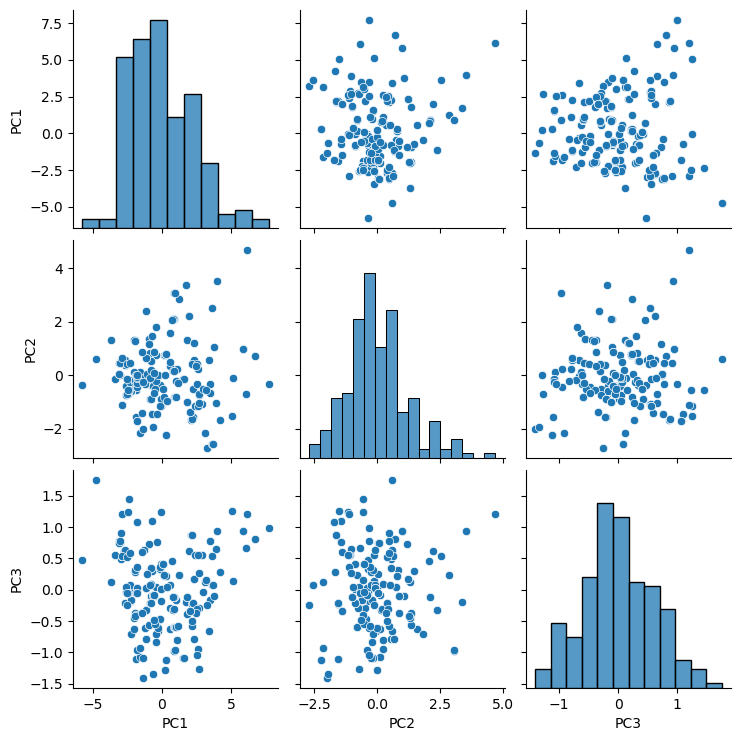

In [169]:
# Define column names for the dataframe
columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'highway-mpg']

# Create a pandas DataFrame with the standardized car data
df = pd.DataFrame(StandardScaler().fit_transform(data), columns=columns)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df)

# Create a new DataFrame with the first three principal components
df_pca = pd.DataFrame(data=principal_components[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Concatenate the first three measurements to the DataFrame
df_pca[['wheel-base', 'length', 'width']] = df[['wheel-base', 'length', 'width']]

# Create a pair plot
sns.pairplot(df_pca, vars=['PC1', 'PC2', 'PC3'], hue=None)
plt.show()


# rocket 2

In [18]:
path = r"./data/rocket.png"
img = io.imread(path)
img = rgb2gray(img)

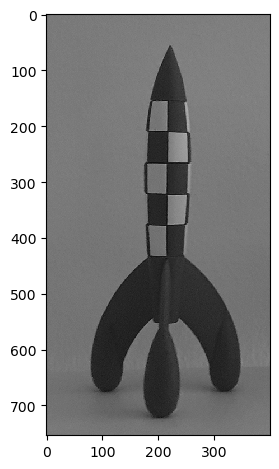

In [20]:
io.imshow(img)

In [19]:
img.dtype

dtype('float64')

In [179]:
def apply_gauss_filter(im, sigma):
    gauss_img = gaussian(im, sigma)
    return gauss_img

In [180]:
gauss_img = apply_gauss_filter(img, 3)

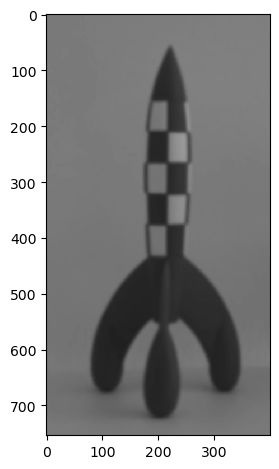

In [181]:
io.imshow(gauss_img)

In [182]:
img_bien = img_as_ubyte(gauss_img)

In [183]:
img_bien[100,100]

123

# sun

In [186]:
path = r"./data/CPHSun.png"
img = io.imread(path)
# img = rgb2gray(img)

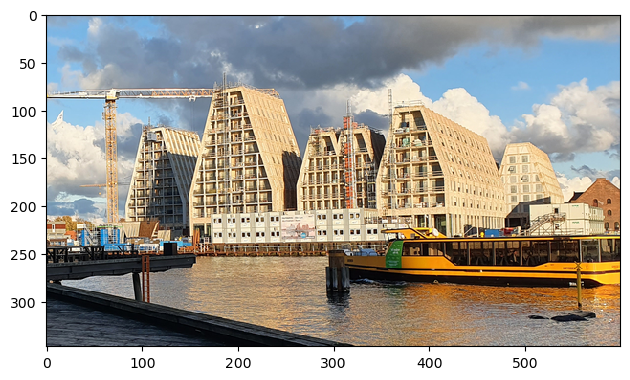

In [187]:
io.imshow(img)

In [194]:
rot_center = [20, 20]
rotation_angle = 16
rotated_img = rotate(img, rotation_angle, center=rot_center)
rot = img_as_ubyte(rotated_img)
print(rot[200,200])

[88 91 95]


In [197]:
# Given values
image_width = 1024  # pixels
image_height = 768  # pixels
bytes_per_pixel = 3  # RGB image (3 bytes per pixel)
transfer_speed = 30  # megabytes per second
processing_time_per_frame = 0.054  # 54 milliseconds to seconds

# Calculate image size in bytes
image_size_bytes = image_width * image_height * bytes_per_pixel

# Calculate transfer time per frame
transfer_time_per_frame = image_size_bytes / (transfer_speed * 1e6)  # convert transfer speed to bytes per second

# Calculate total time per frame
total_time_per_frame = transfer_time_per_frame + processing_time_per_frame

# Calculate FPS
fps = 1 / total_time_per_frame

print("Maximum frames per second:", fps)

Maximum frames per second: 7.53902197775687


# change detection

In [3]:
path1 = r"./data/change1.png"
img1 = io.imread(path1)
img1 = rgb2gray(img1)

path2 = r"./data/change2.png"
img2 = io.imread(path2)
img2 = rgb2gray(img2)

In [7]:
img1.dtype

dtype('float64')

In [8]:
img2.dtype

dtype('float64')

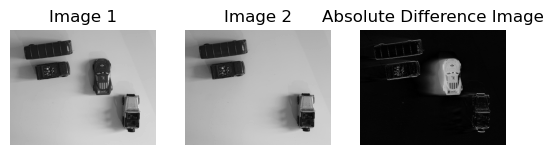

In [11]:
abs_diff_image = cv2.absdiff(img1, img2)

# Display the original images and the absolute difference image
plt.subplot(1, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Image 1'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Image 2'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(abs_diff_image, cmap='gray'), plt.title('Absolute Difference Image'), plt.axis('off')
plt.show()

In [13]:
change_px = np.sum(abs_diff_image>0.3)
print(change_px)

7503


In [17]:
total_px = 360*457
percentage_change = (change_px / total_px)*100
print(f"The percentage of change px is: {percentage_change}")

The percentage of change px is: 4.560539752005835


# landmarks

In [40]:
from skimage.transform import EuclideanTransform
path = r"./data/rocket.png"
img = io.imread(path)
rocket_photo = rgb2gray(img)

In [39]:
source_landmarks = np.array([(220, 55), (105, 675), (315, 675)])
destination_landmarks = np.array([(100, 165), (200, 605), (379, 525)])

# Compute the Euclidean transform
euclidean_transform = transform.EuclideanTransform()
euclidean_transform.estimate(source_landmarks, destination_landmarks)

# print("-----------------calcular el error-----------------")
transformed_source_landmarks = euclidean_transform(source_landmarks)

def landmark_alignment_error(landmarks1, landmarks2):
    return np.sum(np.linalg.norm(landmarks1 - landmarks2, axis=1)**2)

# Compute error before transformation
error_before = landmark_alignment_error(source_landmarks, destination_landmarks)

# Compute error after transformation
error_after = landmark_alignment_error(transformed_source_landmarks, destination_landmarks)

# print("------------------------------------")

# Apply the found transformation to the rocket photo
warped_rocket_photo = transform.warp(rocket_photo, euclidean_transform.inverse)

# Convert the warped image to bytes
warped_image_bytes = img_as_ubyte(warped_rocket_photo)

In [32]:
warped_image_bytes[150,150]

129

In [37]:
error_before

67021.0

In [38]:
error_after

21119.638667058513